In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import copy
import operator

In [6]:
# check is the same point
def is_same_niche(a,b):
    #function_period = 2*np.pi/(2*5.1*np.pi)
    distance = np.abs(a-b)
    
    if distance < NICHE_RADIUS: #0.5*function_period:
        return True
    else:
        return False
# this method is used to delete repeat points
def delete_repeat_niche(points):
    if len(points) == 1:
        return points
    elif len(points) == 0:
        return points
    back_up = []
    back_up.append(points.pop())
    while len(points) != 0:
        current_point = points.pop()
        check_value = []
    
        for i in range(len(back_up)):
        #check distance between current points and previous points
            temp_flag = is_same_niche(back_up[i],current_point)
            check_value.append(str(temp_flag))
    
        if 'True' in check_value:
            pass
        else:
            back_up.append(current_point)
    return back_up

In [7]:
def share_function(metric_d):
    # constants sigma share and alpha 
    #sigma_share = 0.2
    #alpha = 1
    
    if metric_d < NICHE_RADIUS:
        share = 1 - np.power(metric_d/NICHE_RADIUS, NICHE_ALPHA_SHARE)
    else:
        share = 0
    return share

In [8]:
def share_fitness(population, fitness):
    niche_count = niche_count_m(population)
    if niche_count != 0:
        shared_fitness = np.divide(fitness, niche_count)
    #shared_fitness = np.divide(niche_count, fitness)
    return shared_fitness

In [9]:
def niche_count_m(population):
    population_decimal = binary2decimal_batch(population)
    niche_count_m = []
    for i in range(len(population_decimal)):
        niche_count_m_individual = 0
        current_string = population_decimal[i]
        population_decimal_image = copy.deepcopy(population_decimal)
        population_decimal_image.remove(population_decimal_image[i])
        for j in range(len(population_decimal_image)):
            niche_count_m_individual += share_function(metric_space(current_string,population_decimal_image[j]))
        niche_count_m.append(niche_count_m_individual)
    return niche_count_m

In [10]:
def metric_space(x_i, x_j):
    #basic_D = np.sqrt(np.abs(x_i - x_j))
    dual_D = np.abs(x_i - x_j)
    #basic_D_metric = np.power(basic_D,1)
    #dual_D_metric = np.power(dual_D,0)
    #return np.multiply(basic_D_metric,dual_D_metric)
    return dual_D

In [11]:
def select_mating_pool(pop, fitness, num_parents):
    fitness_copy = copy.deepcopy(fitness)
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        # return data type is tuple
        max_fitness_idx = np.where(fitness_copy == np.max(fitness_copy))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness_copy[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = np.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring
def mutation(offspring_crossover):
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        weight_max = 2
        weight_min = -2
        mutation_constant = 0.8
        for i in range(offspring_crossover.shape[1]):
            pos = np.random.randint(0,100,1)%2
            if np.random.randint(0,4,1)%2 == 0:
                offspring_crossover[idx,pos]=offspring_crossover[idx,pos]+mutation_constant*(weight_max-offspring_crossover[idx,pos])*np.random.random()
            else:
                offspring_crossover[idx,pos]=offspring_crossover[idx,pos]-mutation_constant*(offspring_crossover[idx,pos]-weight_min)*np.random.random()
    return offspring_crossover
def get_individual_fitness(individual):
    decimal_value = binary2domain(individual)
    #temp = np.sin(5.1*np.pi*decimal_value+0.5)
    temp = np.cos(5.1*np.pi*decimal_value+0.5)
    fitness = np.power(temp,6)
    return fitness
def get_individual_fitness_decimal(individual):
    #temp = np.sin(5.1*np.pi*individual+0.5)
    temp = np.cos(5.1*np.pi*individual+0.5)
    fitness = np.power(temp,6)
    return fitness

def get_population_fitness(population):
    fitness = []
    for i in range(population.shape[0]):
        temp = get_individual_fitness(population[i])
        fitness.append(temp)
    return fitness

In [12]:
def target_function2(decimal_value):
    step1 = np.power(decimal_value-0.0667,2)
    step2 = np.divide(step1,0.64)
    step3 = np.multiply(step2,-4*np.log(2))
    step3 = np.power(np.e,step3)
    return np.multiply(get_individual_fitness_decimal(decimal_value),step3)

In [ ]:
"""
fig = plt.figure(111)
axes1 = fig.add_subplot(111)
x = np.arange(0,1,0.01)
y = list(map(lambda i: target_function2(i),x))
axes1.plot(x,y)
"""

In [13]:
def binary2decimal(chromesome):
    decimal = 0
    length = len(chromesome)
    for i in range(length):
        decimal = decimal + chromesome[i]*np.power(2,length-i-1)
    return decimal
def binary2domain(chromesome):
    decimal = binary2decimal(chromesome)
    #embedding_value = (1+decimal)/np.power(2,15) - 1
    embedding_value = (1+decimal)/np.power(2,16)
    return embedding_value

In [14]:
def binary2decimal_batch(population):
    decimal_batch = []
    for i in range(population.shape[0]):
        decimal = binary2domain(population[i].tolist())
        decimal_batch.append(decimal)
    return decimal_batch

In [15]:
# Criterion 
APPARENT_RELIABILITY = 0
AVERAGE_OPTIMAL_NUMBER = 0
NORMALIZED_COST = 0
POPULATION_RICHNESS = 0
NICHE_NUMBER = 0

In [16]:
def getBestOutputNumber(population):
    #fitness = list(set(fitness))
    #best_individual_index_tuple = np.where(np.array(fitness)>0.8)
    #best_individual_index_array = best_individual_index_tuple[0]
    #return best_individual_index_array.shape[0]
    return getPopulationRichness(population,0.99)
def getApparentReliability(fitness):
    if max(fitness)>0.98:
        return 1;
    else:
        return 0;
def getPopulationRichness(population,fitness_level):
    decimal_batch = list(set(binary2decimal_batch(population)))
    fitness = list(map(lambda i: get_individual_fitness_decimal(i),decimal_batch))
    best_individual_index_tuple = np.where(np.array(fitness)>fitness_level)
    best_individual_index_array = best_individual_index_tuple[0]
    return best_individual_index_array.shape[0]
    

In [24]:
for i in [5,15,30,50,75]:
    GENERATION = i
    for j in [1/3,1/2,1,2,3]:
        NICHE_ALPHA_SHARE = j
        
        #parameter of share function********************
        NICHE_RADIUS = np.pi/(2*5.1*np.pi)
        NICHE_ALPHA_SHARE = 1
        RUNTIMES = 1
        # Criterion*************************** 
        APPARENT_RELIABILITY = 0
        NORMALIZED_COST = 0
        AVERAGE_OPTIMAL_NUMBER = 0
        POPULATION_RICHNESS = 0
        NICHE_NUMBER = 0
        POPULATION_RICHNESS_1_8 = 0
        POPULATION_RICHNESS_2_8 = 0
        POPULATION_RICHNESS_4_8 = 0
        POPULATION_RICHNESS_7_8 = 0
        #*************************************
        best_output_number_all = 0
        apparent_reliability_all = 0
        niche_number_all = 0
        population_richness_all = 0
        population_richness_7_8_niche_radius_all=0
        population_richness_4_8_niche_radius_all=0
        population_richness_2_8_niche_radius_all=0
        population_richness_1_8_niche_radius_all=0
        #*************************************
        for i in range(RUNTIMES):
            #GENERATION = 40
            POPULATION = 50
            CHROME_LENGTH = 16
            pop_size  = (POPULATION,CHROME_LENGTH)
            parent_population = np.random.randint(0,2,pop_size)
            BEST_OUTPUTS=[]
            ELITIST_PERCENT = 0.8


            for i in range(GENERATION):
                fitness = get_population_fitness(parent_population)
                parent_population_backup = copy.deepcopy(parent_population)
                shareFitness = share_fitness(parent_population, fitness)
                #BEST_OUTPUTS.append(max(fitness))
                parents = select_mating_pool(parent_population, shareFitness, int(ELITIST_PERCENT*POPULATION))
                offspring_crossover = crossover(parents,
                                                offspring_size=(pop_size[0]-parents.shape[0], CHROME_LENGTH))
                #offspring_mutation = mutation(offspring_crossover)
                parent_population[0:parents.shape[0], :] = parents
                #parent_population[parents.shape[0]:, :] = offspring_mutation
                parent_population[parents.shape[0]:, :] = offspring_crossover

            #matplotlib.pyplot.plot(BEST_OUTPUTS)
            best_ouput_number_onetime = getBestOutputNumber(parent_population_backup)
            best_output_number_all += best_ouput_number_onetime

            apparent_reliability_onetime = getApparentReliability(fitness)
            apparent_reliability_all += apparent_reliability_onetime

            population_richness_1_8_niche_radius_one_time = getPopulationRichness(parent_population_backup,255/256)
            population_richness_1_8_niche_radius_all += population_richness_1_8_niche_radius_one_time
            population_richness_2_8_niche_radius_one_time = getPopulationRichness(parent_population_backup,252/256)
            population_richness_2_8_niche_radius_all += population_richness_2_8_niche_radius_one_time
            population_richness_4_8_niche_radius_one_time = getPopulationRichness(parent_population_backup,224/256)
            population_richness_4_8_niche_radius_all += population_richness_4_8_niche_radius_one_time
            population_richness_7_8_niche_radius_one_time = getPopulationRichness(parent_population_backup,128/256)
            population_richness_7_8_niche_radius_all += population_richness_7_8_niche_radius_one_time

            decimal_batch = binary2decimal_batch(parent_population_backup)
            niche_number_onetime = len(delete_repeat_niche(list(set(decimal_batch))))
            niche_number_all += niche_number_onetime

        APPARENT_RELIABILITY = apparent_reliability_all/RUNTIMES
        NORMALIZED_COST = POPULATION*GENERATION/APPARENT_RELIABILITY
        AVERAGE_OPTIMAL_NUMBER = best_output_number_all/RUNTIMES
        POPULATION_RICHNESS_1_8 = population_richness_1_8_niche_radius_all/RUNTIMES
        POPULATION_RICHNESS_2_8 = population_richness_2_8_niche_radius_all/RUNTIMES
        POPULATION_RICHNESS_4_8 = population_richness_4_8_niche_radius_all/RUNTIMES
        POPULATION_RICHNESS_7_8 = population_richness_7_8_niche_radius_all/RUNTIMES
        NICHE_NUMBER = niche_number_all/RUNTIMES
        print("the argument is the following: \n","apparent_reliability="+str(APPARENT_RELIABILITY),
              "normalized_cost="+str(NORMALIZED_COST),"best_output_number="+str(AVERAGE_OPTIMAL_NUMBER),
              "\n population_richness_1_8="+str(POPULATION_RICHNESS_1_8),
              "population_richness_2_8="+str(POPULATION_RICHNESS_2_8),
              "\n population_richness_4_8="+str(POPULATION_RICHNESS_4_8),
              "population_richness_7_8="+str(POPULATION_RICHNESS_7_8),
              "\n niche_number="+str(NICHE_NUMBER))
   

/Users/kismet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


the argument is the following: 
 apparent_reliability=1.0 normalized_cost=2000.0 best_output_number=6.0 
 population_richness_1_8=4.0 population_richness_2_8=7.0 
 population_richness_4_8=11.0 population_richness_7_8=11.0 
 niche_number=4.0


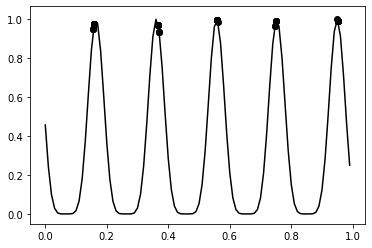

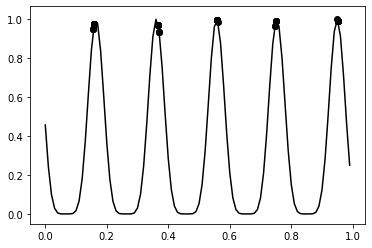

In [21]:
#parameter of share function********************
NICHE_RADIUS = np.pi/(2*5.1*np.pi)
NICHE_ALPHA_SHARE = 1
#********************
GENERATION = 50
POPULATION = 50
CHROME_LENGTH = 16
pop_size  = (POPULATION,CHROME_LENGTH)
parent_population = np.random.randint(0,2,pop_size)
BEST_OUTPUTS=[]
ELITIST_PERCENT = 0.8


for i in range(GENERATION):
    fitness = get_population_fitness(parent_population)
    parent_population_backup = copy.deepcopy(parent_population)
    shareFitness = share_fitness(parent_population, fitness)
    #BEST_OUTPUTS.append(max(fitness))
    parents = select_mating_pool(parent_population, shareFitness, int(ELITIST_PERCENT*POPULATION))
    offspring_crossover = crossover(parents,
                                    offspring_size=(pop_size[0]-parents.shape[0], CHROME_LENGTH))
    #offspring_mutation = mutation(offspring_crossover)
    parent_population[0:parents.shape[0], :] = parents
    #parent_population[parents.shape[0]:, :] = offspring_mutation
    parent_population[parents.shape[0]:, :] = offspring_crossover
    
#matplotlib.pyplot.plot(BEST_OUTPUTS)
#bestOuptputNumber = getBestOutputNumber(parent_population_backup)
#print("bestOuptputNumber is: ",bestOuptputNumber)
#APPARENT_RELIABILITY = getApparentReliability(fitness)
#NORMALIZED_COST = POPULATION*GENERATION/APPARENT_RELIABILITY

decimal_batch = binary2decimal_batch(parent_population_backup)
#print(set(decimal_batch))
#niche = delete_repeat_niche(list(set(decimal_batch)))
#print(niche)
#richness = getPopulationRichness(parent_population_backup,0.8)
#print("richness is: ",richness)


fig = plt.figure(111)
axes1 = fig.add_subplot(111)
x = np.arange(0,1,0.01)
y = list(map(lambda i: get_individual_fitness_decimal(i),x))
axes1.plot(x,y,color='black')
axes1.scatter(decimal_batch,fitness,color='black')
fig


In [ ]:
#pic1
sigma = [0.5,0.8,1.0,1.2,1.5,2.0,3.0]
R = [0.98,0.92,0.98,0.98,0.96,0.96,0.96]
C = [2040,2173,2040,2040,2083,2083,2083]
O_n = [4.64,4.56,5.10,5.32,4.80,3.94,2.08]
P_r = [13.02,13.08,13.36,11.72,9.80,7.50,3.58]
N_n = [5.08,5.22,5.52,5.36,4.68,4.10,2.34]

fig,ax1=plt.subplots()

ax1.plot(sigma,P_r,color="blue",label=r'$P_r$')
ax1.axis([0.5,3,0,15])
ax1.set_ylabel(r'$P_r$',fontsize=14)
plt.xlabel(r'$\sigma$',fontsize=14)

ax2 = ax1.twinx()
ax2.plot(sigma,O_n,color="red",label=r'$O_n$')
ax2.plot(sigma,N_n,color="green",label=r'$N_n$')
ax2.axis([0.5,3,1,6])
ax2.set_ylabel(r'$O_n$ and $N_n$',fontsize=14)
fig.legend(loc='upper center',bbox_to_anchor=(0.8,0.85),fontsize=14)

In [ ]:
#pic1
l_step = [1.1,1.6,2.1,2.6,3.1,3.6,4.1]
R = [0.98,0.98,0.98,1.00,0.98,0.96,0.98]
C = [2040,2040,2040,2000,2040,2083,2040]
O_n = [4.08,5.10,5.18,5.16,4.70,4.50,4.86]
P_r = [12.24,13.36,12.06,10.2,9.32,8.22,8.44]
N_n = [5.42,5.52,5.12,4.66,4.44,4.12,4.18]

fig,ax1=plt.subplots()

ax1.plot(sigma,P_r,color="blue",label=r'$P_r$')
#ax1.axis([0.5,3,0,15])
ax1.set_ylabel(r'$P_r$',fontsize=14)
plt.xlabel(r'$d_{constant}$',fontsize=14)

ax2 = ax1.twinx()
ax2.plot(sigma,O_n,color="red",label=r'$O_n$')
ax2.plot(sigma,N_n,color="green",label=r'$N_n$')
ax2.axis([0.5,3,1,6])
ax2.set_ylabel(r'$O_n$ and $N_n$',fontsize=14)
fig.legend(loc='upper center',bbox_to_anchor=(0.8,0.6),fontsize=14)

In [ ]:
import numpy as np
np.random.seed(4)
